# Importing libraries

In [4]:
import numpy as np
import cv2
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.applications import vgg16
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

Using TensorFlow backend.


# Organize, process and visualize the data

This time I'm going to build and train a basic CNN model with 4 artists. I have chosen Edgar Degas, Pablo Picasso, Vicent van Gogh and Paul Gauguin because they have more paintings than the other artists in the dataset.

In [149]:
#Organizing data into train, validation and test sets

os.chdir('Data/Artists_4')
if os.path.isdir('train/Vincent_van_Gogh') is False:
    os.makedirs('train/Vincent_van_Gogh')
    os.makedirs('train/Edgar_Degas')
    os.makedirs('train/Pablo_Picasso')
    os.makedirs('train/Paul_Gauguin')
    os.makedirs('valid/Vincent_van_Gogh')
    os.makedirs('valid/Edgar_Degas')
    os.makedirs('valid/Pablo_Picasso')
    os.makedirs('valid/Paul_Gauguin')
    os.makedirs('test/Vincent_van_Gogh')
    os.makedirs('test/Edgar_Degas')
    os.makedirs('test/Pablo_Picasso')
    os.makedirs('test/Paul_Gauguin')

    for i in random.sample(glob.glob('Edgar_Degas*'), 500):
        shutil.move(i, 'train/Edgar_Degas')      
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 500):
        shutil.move(i, 'train/Vincent_van_Gogh')
    for i in random.sample(glob.glob('Pablo_Picasso*'), 200):
        shutil.move(i, 'train/Pablo_Picasso')      
    for i in random.sample(glob.glob('Paul_Gauguin*'), 200):
        shutil.move(i, 'train/Paul_Gauguin')
        
    for i in random.sample(glob.glob('Edgar_Degas*'), 100):
        shutil.move(i, 'valid/Edgar_Degas')      
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 100):
        shutil.move(i, 'valid/Vincent_van_Gogh')
    for i in random.sample(glob.glob('Pablo_Picasso*'), 100):
        shutil.move(i, 'valid/Pablo_Picasso')      
    for i in random.sample(glob.glob('Paul_Gauguin*'), 80):
        shutil.move(i, 'valid/Paul_Gauguin')
        
    for i in random.sample(glob.glob('Edgar_Degas*'), 50):
        shutil.move(i, 'test/Edgar_Degas')      
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 50):
        shutil.move(i, 'test/Vincent_van_Gogh')
    for i in random.sample(glob.glob('Pablo_Picasso*'), 50):
        shutil.move(i, 'test/Pablo_Picasso')      
    for i in random.sample(glob.glob('Paul_Gauguin*'), 20):
        shutil.move(i, 'test/Paul_Gauguin')

os.chdir('../../')

In [150]:
train_path = 'Data/Artists_4/train'
valid_path = 'Data/Artists_4/valid'
test_path = 'Data/Artists_4/test'

In [151]:
#Preprocessing images using Keras ImageDataGenerator

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Paul_Gauguin'], batch_size=10, shuffle=False)

Found 1400 images belonging to 4 classes.
Found 380 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [86]:
#We now call next(train_batches) to generate a batch of images and labels
imgs, labels = next(train_batches)

In [87]:
#Visualize processed images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

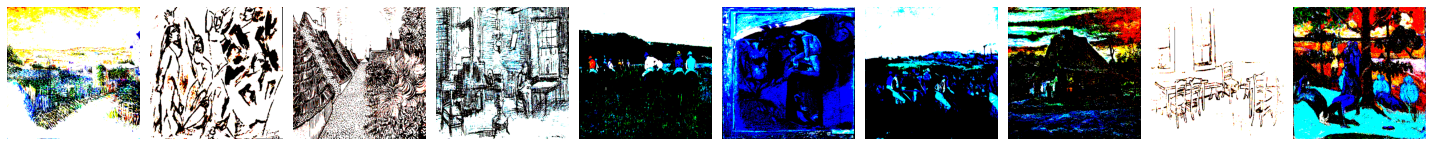

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [88]:
plotImages(imgs)
print(labels)

# Build and train the CNN (Convolutional Neural Network)

In [119]:
#We will be using function 'callback' to reduce the overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks = [early_stop, reduce_lr] 

### CNN model with input shape 400x400

I'm going to train the model  

In [120]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(400,400,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')])

In [121]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    callbacks=callbacks,
    epochs=20,
    verbose=2)

Epoch 1/20
140/140 - 231s - loss: 60.7333 - acc: 0.4750 - val_loss: 18.4835 - val_acc: 0.4737
Epoch 2/20
140/140 - 212s - loss: 3.8671 - acc: 0.7936 - val_loss: 9.0626 - val_acc: 0.5316
Epoch 3/20
140/140 - 212s - loss: 0.6202 - acc: 0.9279 - val_loss: 8.8909 - val_acc: 0.5395
Epoch 4/20
140/140 - 212s - loss: 0.1740 - acc: 0.9686 - val_loss: 7.0883 - val_acc: 0.5921
Epoch 5/20
140/140 - 212s - loss: 0.1236 - acc: 0.9793 - val_loss: 6.4618 - val_acc: 0.6158
Epoch 6/20
140/140 - 212s - loss: 0.0814 - acc: 0.9857 - val_loss: 6.5011 - val_acc: 0.6000
Epoch 7/20
140/140 - 235s - loss: 0.0650 - acc: 0.9900 - val_loss: 6.3136 - val_acc: 0.5947
Epoch 8/20
140/140 - 213s - loss: 0.0209 - acc: 0.9943 - val_loss: 5.3840 - val_acc: 0.6211
Epoch 9/20
140/140 - 212s - loss: 7.0302e-04 - acc: 1.0000 - val_loss: 6.1558 - val_acc: 0.6211
Epoch 10/20
140/140 - 213s - loss: 1.7963e-04 - acc: 1.0000 - val_loss: 6.0012 - val_acc: 0.5921
Epoch 11/20
140/140 - 218s - loss: 1.6932e-05 - acc: 1.0000 - val_los

In [123]:
#Save the model
import os.path
if os.path.isfile('Model/cnn_model400_20e_.h5') is False:
    model.save('Model/cnn_model400_20e_.h5')

### Prediction

In [124]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

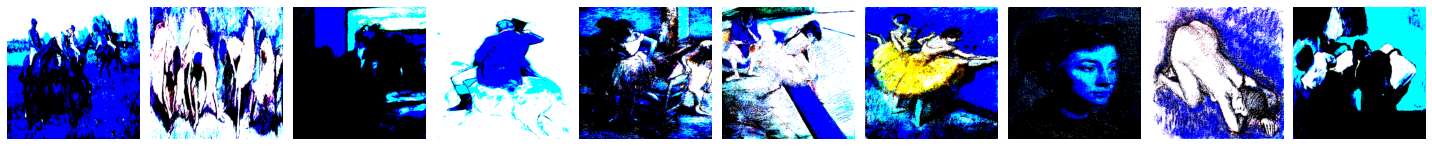

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [125]:
plotImages(test_imgs)
print(test_labels)

In [126]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [127]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

17/17 - 12s


In [128]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],


In [129]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [130]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [131]:
test_batches.class_indices

{'Edgar_Degas': 0,
 'Vincent_van_Gogh': 1,
 'Pablo_Picasso': 2,
 'Paul_Gauguin': 3}

Confusion matrix, without normalization
[[38  9  1  2]
 [ 8 40  2  0]
 [15 13 19  3]
 [ 6  5  2  7]]


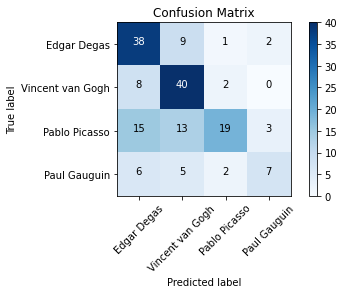

In [132]:
cm_plot_labels = ['Edgar Degas','Vincent van Gogh', 'Pablo Picasso', 'Paul Gauguin']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### CNN model with input shape 224x224

In [134]:
#Model with input_shape=(224,224)
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')])

In [135]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [136]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    callbacks=callbacks,
    epochs=20,
    verbose=2)

Epoch 1/20
140/140 - 87s - loss: 23.9306 - acc: 0.4707 - val_loss: 6.9701 - val_acc: 0.5132
Epoch 2/20
140/140 - 81s - loss: 2.0833 - acc: 0.7407 - val_loss: 6.8596 - val_acc: 0.4263
Epoch 3/20
140/140 - 88s - loss: 0.6153 - acc: 0.8807 - val_loss: 5.1185 - val_acc: 0.4842
Epoch 4/20
140/140 - 81s - loss: 0.1894 - acc: 0.9479 - val_loss: 3.5649 - val_acc: 0.5474
Epoch 5/20
140/140 - 78s - loss: 0.0387 - acc: 0.9871 - val_loss: 4.0805 - val_acc: 0.5342
Epoch 6/20
140/140 - 76s - loss: 0.0168 - acc: 0.9950 - val_loss: 4.3018 - val_acc: 0.5316
Epoch 7/20
140/140 - 81s - loss: 0.0081 - acc: 0.9971 - val_loss: 4.4868 - val_acc: 0.5395
Epoch 8/20

Epoch 00008: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
140/140 - 76s - loss: 0.0011 - acc: 1.0000 - val_loss: 3.6672 - val_acc: 0.5500
Epoch 9/20
140/140 - 77s - loss: 3.9757e-04 - acc: 1.0000 - val_loss: 3.6629 - val_acc: 0.5526
Epoch 10/20
140/140 - 75s - loss: 3.8269e-04 - acc: 1.0000 - val_loss: 3.6612 - val_acc: 0.5526

In [137]:
#Save model
if os.path.isfile('Model/cnn_model224_20e_.h5') is False:
    model.save('Model/cnn_model224_20e_.h5')

### Prediction

In [138]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

17/17 - 5s


In [139]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [141]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[36 10  3  1]
 [ 6 38  3  3]
 [17  6 23  4]
 [ 4 10  1  5]]


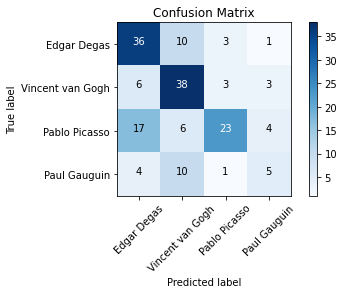

In [142]:
#Confusion matrix
cm_plot_labels = ['Edgar Degas','Vincent van Gogh', 'Pablo Picasso', 'Paul Gauguin']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')